<a href="https://colab.research.google.com/github/mcnica89/Markov-Chains-RL-W25/blob/main/GamblersProblemWithForLoops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Gambler's Problem Solved with For Loops

From class on Th Feb 11


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

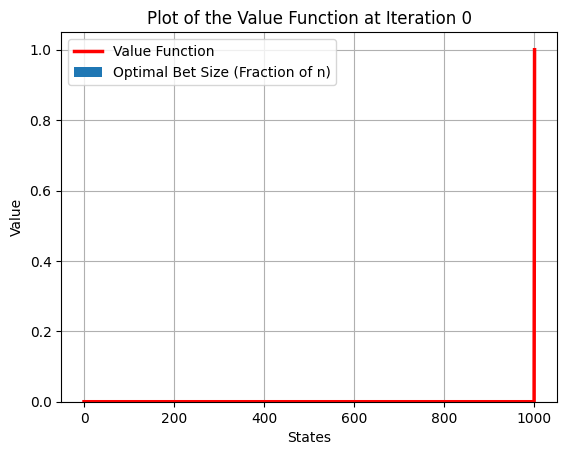

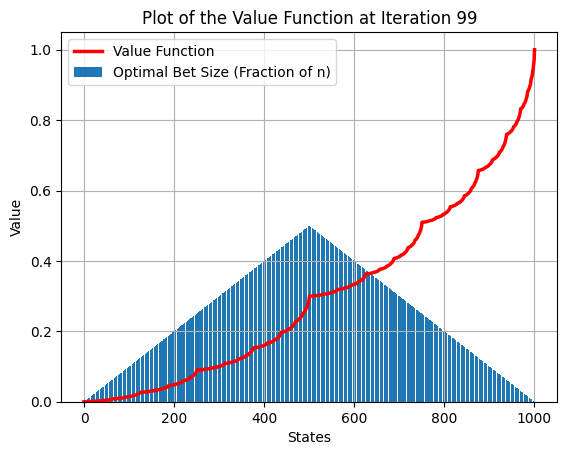

In [ ]:
n = 10001
p_win = 0.3

v = np.zeros(n+1) #THE VALUE FUNCTION! #n+1 since python starts at zero
#v[s] represents the value at state s for s in 0 to n inclusive

q = np.zeros((n+1,n+1)) #THE Q FUNCTIONS! q[s,a] s is betw 0 and 100, a is betw 0 and 100

v[0] = 0.0
v[n] = 1.0

policy = np.ones(n+1) #THE POLICY! Tells you the optimal bet size at position s
#will be derived from the q function
q_tie_breaks = np.zeros((n+1,n+1))

num_iters = 100
for iter in range(num_iters):
  #Bellman Equation iterated ONCE

  #first part of the Belman equation!
  for s in range(1,n-1+1):
    a_max = min(s,n-s)
    v[s] = np.max( q[s,1:a_max+1] )
    policy[s] = np.argmax( q[s,1:a_max+1] ) + 1


  #second part of the Belman equaiton
  for s in range(1,n-1+1):
    a_max = min(s,n-s)
    for a in range(1,a_max+1):
      q[s,a] =p_win*v[np.minimum(s+a,n)]+(1-p_win)*v[np.maximum(s-a,0)]

  #plotting stuff
  num_plots = 1 #num_iters
  if iter==0 or (iter+1) % (num_iters // num_plots) == 0: #plot 10 times
    x = range(n+1)  # Assuming each index corresponds to x values
    plt.plot(x, v,linewidth=2.5,color='r',label="Value Function")
    plt.bar(x,policy/n,label="Optimal Bet Size (Fraction of n)")
    plt.xlabel('States')
    plt.ylabel('Value')
    plt.title(f'Plot of the Value Function at Iteration {iter}')
    plt.grid(True)
    plt.legend()
    plt.show()


In [ ]:
()